# National libraries and authors of 17th century: A Wikidata approach

Digital humanities research methods include the identification of patterns in corpus and datasets.For example, the following is a typical scenario: find all authors in the 17th century. While a traditional digital catalogue may offer this information, LOD enables the inclusion of external links to retrieve contextual information to compute statistics.

National libraries have made a great effort to provide their catalogs as LOD. Previous research include several approaches based on different vocabularies and methodologies.

LOD enables the creation of links to external datasets. In this sense, Wikidata is playing a leading role to link to GLAM projects based on Semantic Web technologies. A property is created for each institution in order to establish links. For instance, the property wdt:P268 has been defined in Wikidata to create links to resources published at the BnF LOD repository.


## Setting up things

In [2]:
import requests as r
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  
from datapackage import Package
from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
from matplotlib.pyplot import figure

## Let's query the repository by asking the authors linked in Wikidata
We will use the [SPARQL endpoint](https://bnb.data.bl.uk/flint-sparql) to create the query and configure the request to retrieve json as a result.

*Note: The execution of this query may take a while. The result is already provided in this [project](libraries-data.json) so you can pass to the next step.*

In [ ]:
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""
SELECT DISTINCT ?item ?itemLabel ?id ?birthdate ?deathdate ?org ?writtenLanguageLabel ?deathcauseLabel ?placeofburial ?placeofburialLabel ?geoplaceofburial (group_concat(DISTINCT ?occupation;separator="|") as ?occupationLabel)
WHERE {
{ 
  BIND('BNE' AS ?org)
  ?item wdt:P950 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700)
} 
  UNION { 
  BIND('GR' AS ?org)
  ?item wdt:P3348 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700) 
}
 UNION { 
  BIND('KB' AS ?org)
  ?item wdt:P1006 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700) 
}
  UNION { 
  BIND('KR' AS ?org)
  ?item wdt:P5034 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700) 
}
UNION { 
  BIND('BNB' AS ?org)
  ?item wdt:P5361 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700) 
}
UNION{ 
  BIND('BNF' AS ?org)
  ?item wdt:P268 ?id . 
  OPTIONAL {?item wdt:P6886 ?writtenLanguage .}
  OPTIONAL {?item wdt:P509 ?deathcause .}
  OPTIONAL {?item wdt:P106 ?occupation .}
  OPTIONAL {?item wdt:P119 ?placeofburial . ?placeofburial wdt:P625 ?geoplaceofburial}
  ?item wdt:P570 ?deathdate .
  ?item wdt:P569 ?birthdate .
  FILTER (YEAR(?birthdate) > 1599 && YEAR(?birthdate) <= 1700) 
}
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?item ?itemLabel ?id ?birthdate ?deathdate ?org ?writtenLanguageLabel ?deathcauseLabel ?placeofburial ?placeofburialLabel ?geoplaceofburial
""")
sparql.setReturnFormat(JSON)
#results = sparql.query().convert()

## Save as a JSON file

In [ ]:
#with open('libraries-data.json', 'w') as json_file:
#    json.dump(results, json_file)

## Exploring the data

In [3]:
# Load the JSON file from disk
# This puts the data in a Pandas DataFrame
with open('libraries-data.json') as f:
    data = json.load(f)

libraries_df = pd.io.json.json_normalize(data['results']['bindings'])    
libraries_df.head()

/home/gustavo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,item.type,item.value,itemLabel.xml:lang,itemLabel.type,itemLabel.value,id.type,id.value,birthdate.datatype,birthdate.type,birthdate.value,...,placeofburialLabel.value,geoplaceofburial.datatype,geoplaceofburial.type,geoplaceofburial.value,writtenLanguageLabel.xml:lang,writtenLanguageLabel.type,writtenLanguageLabel.value,deathcauseLabel.xml:lang,deathcauseLabel.type,deathcauseLabel.value
0,uri,http://www.wikidata.org/entity/Q3766070,en,literal,Giovan Battista Fagiuoli,literal,107165880,http://www.w3.org/2001/XMLSchema#dateTime,literal,1660-06-24T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,uri,http://www.wikidata.org/entity/Q1698179,en,literal,John Punch,literal,242697100,http://www.w3.org/2001/XMLSchema#dateTime,literal,1603-01-01T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uri,http://www.wikidata.org/entity/Q8084303,en,literal,İsmail Hakkı Bursevî,literal,12062812c,http://www.w3.org/2001/XMLSchema#dateTime,literal,1653-01-01T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,uri,http://www.wikidata.org/entity/Q98923992,en,literal,Gaetano Cattaneo,literal,105999894,http://www.w3.org/2001/XMLSchema#dateTime,literal,1696-01-01T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,uri,http://www.wikidata.org/entity/Q4194354,en,literal,Alexey Zubov,literal,15907326m,http://www.w3.org/2001/XMLSchema#dateTime,literal,1682-01-01T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's see the columns

In [ ]:
libraries_df.columns 

## How many items?

In [ ]:
# How many items?
len(libraries_df)

### Let's count the number of unique resources 

In [ ]:
libraries_df['item.value'].nunique()

## Create Data Package
Data Package is a simple container format for describing a coherent collection of data in a single 'package'. It provides the basis for convenient delivery, installation and management of datasets. There is a Python library for working with Data Packages.

In [ ]:
package = Package()
package.infer('libraries-data.json')
package.descriptor

### Save the data package
The Data Package contains the data and the descriptor as a zip file.

In [ ]:
package.save('datapackage.zip')

### How many authors contains a place of burial

In [ ]:
df = libraries_df[libraries_df['placeofburialLabel.value'].notnull()]
len(df)

### Create a chart to visualize the authors per institution in the dataset

In [ ]:
ax = libraries_df['org.value'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of authors in the 17th century per library")
ax.set_xlabel("Library")
ax.set_ylabel("Authors")
plt.show()

## Identifying the most common causes of death

In [ ]:
ax = libraries_df['deathcauseLabel.value'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Causes of death of authors in the 17th century")
ax.set_xlabel("Cause of death")
ax.set_ylabel("Number of authors")
plt.show()

### Splitting occupation field

In [4]:
#occupation_df = libraries_df['item.value'],libraries_df['occupationLabel.value'].str.split('|', expand=True)
#occupation_df = libraries_df.loc['item.value','occupationLabel.value']
columns = ['item.value','occupationLabel.value']
occupation_df = pd.DataFrame(libraries_df, columns=columns)
occupation_df.head()

,item.value,occupationLabel.value
0,http://www.wikidata.org/entity/Q3766070,http://www.wikidata.org/entity/Q214917|http://...
1,http://www.wikidata.org/entity/Q1698179,http://www.wikidata.org/entity/Q4964182
2,http://www.wikidata.org/entity/Q8084303,http://www.wikidata.org/entity/Q36834|http://w...
3,http://www.wikidata.org/entity/Q98923992,
4,http://www.wikidata.org/entity/Q4194354,http://www.wikidata.org/entity/Q13365770|http:...


In [5]:
# Step 1
# We start with creating a new dataframe from the series with EmployeeId as the index
occupation_df = pd.DataFrame(libraries_df['occupationLabel.value'].str.split('|').tolist(), index=libraries_df['item.value']).stack()

# Step 2
# We now want to get rid of the secondary index
# To do this, we will make item.value as a column (it can't be an index since the values will be duplicated)
occupation_df = occupation_df.reset_index([0, 'item.value'])

# Step 3
# The final step is to set the column names as we want them
occupation_df.columns = ['item.value', 'occupationLabel.value']
occupation_df.head()

,item.value,occupationLabel.value
0,http://www.wikidata.org/entity/Q3766070,http://www.wikidata.org/entity/Q214917
1,http://www.wikidata.org/entity/Q3766070,http://www.wikidata.org/entity/Q49757
2,http://www.wikidata.org/entity/Q3766070,http://www.wikidata.org/entity/Q36180
3,http://www.wikidata.org/entity/Q1698179,http://www.wikidata.org/entity/Q4964182
4,http://www.wikidata.org/entity/Q8084303,http://www.wikidata.org/entity/Q36834


In [6]:
len(occupation_df)

67580

In [7]:
occupation_df['occupationLabel.value'].unique()

array(['http://www.wikidata.org/entity/Q214917',
       'http://www.wikidata.org/entity/Q49757',
       'http://www.wikidata.org/entity/Q36180',
       'http://www.wikidata.org/entity/Q4964182',
       'http://www.wikidata.org/entity/Q36834', '',
       'http://www.wikidata.org/entity/Q13365770',
       'http://www.wikidata.org/entity/Q10862983',
       'http://www.wikidata.org/entity/Q1028181',
       'http://www.wikidata.org/entity/Q1234713',
       'http://www.wikidata.org/entity/Q18576582',
       'http://www.wikidata.org/entity/Q482980',
       'http://www.wikidata.org/entity/Q151197',
       'http://www.wikidata.org/entity/Q81096',
       'http://www.wikidata.org/entity/Q42973',
       'http://www.wikidata.org/entity/Q219477',
       'http://www.wikidata.org/entity/Q16031530',
       'http://www.wikidata.org/entity/Q14915627',
       'http://www.wikidata.org/entity/Q170790',
       'http://www.wikidata.org/entity/Q169470',
       'http://www.wikidata.org/entity/Q121594',
       '

## Getting the most common occupations

In [8]:
occupation_df.groupby("occupationLabel.value")['item.value'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,occupationLabel.value,count
613,http://www.wikidata.org/entity/Q36180,5237
0,,3707
4,http://www.wikidata.org/entity/Q1028181,3400
620,http://www.wikidata.org/entity/Q36834,2791
380,http://www.wikidata.org/entity/Q201788,2402
80,http://www.wikidata.org/entity/Q1234713,2331
701,http://www.wikidata.org/entity/Q49757,2324
857,http://www.wikidata.org/entity/Q82955,2260
233,http://www.wikidata.org/entity/Q1622272,2154
487,http://www.wikidata.org/entity/Q250867,1490


### Create a graph to identify patterns in occupation information

KeyError: 'https://www.wikidata.org/wiki/Q36180'

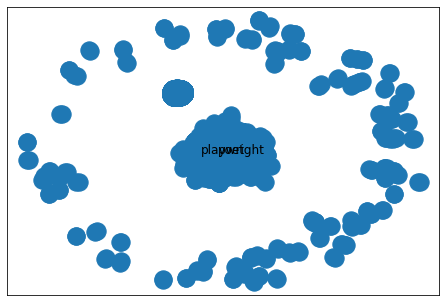

In [9]:
# Build your graph
G = nx.from_pandas_edgelist(occupation_df, 'item.value', 'occupationLabel.value')

labeldict = {}
labeldict["http://www.wikidata.org/entity/Q214917"] = "playwright"
labeldict["http://www.wikidata.org/entity/Q49757"] = "poet"
labeldict["https://www.wikidata.org/wiki/Q36180"] = "writer"
labeldict["https://www.wikidata.org/wiki/Q1622272"] = "university teacher"
labeldict["http://www.wikidata.org/entity/Q36834"] = "composer"
labeldict["https://www.wikidata.org/wiki/Q1028181"] = "painter"
labeldict["https://www.wikidata.org/wiki/Q201788"] = "historian"
labeldict["http://www.wikidata.org/entity/Q1234713"] = "theologian"
labeldict["http://www.wikidata.org/entity/Q82955"] = "politician"

# Plot it
nx.draw(G, labels=labeldict, with_labels = True)

plt.show()

In [ ]:
# Build your graph
G = nx.from_pandas_edgelist(occupation_df, 'item.value', 'occupationLabel.value')

# Plot it
nx.draw(G, with_labels = False)

plt.show()

## References
* https://rebeccabilbro.github.io/sparql-from-python/
* https://ipycytoscape.readthedocs.io/en/latest/
* https://nbviewer.jupyter.org/github/WillKoehrsen/Data-
* Analysis/blob/master/plotly/Plotly%20Whirlwind%20Introduction.ipynb
* https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e
* https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675